In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime

pd.set_option("display.precision", 2)
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

In [2]:
raw_df = pd.read_csv('TRAIN_SET_2021.csv')
print(raw_df.shape)
raw_df.head()

(15673, 28)


,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,Snack Bar,201 E Sands Ave,Las Vegas,Nevada,89169-2617,0.0,A,25.0,27.96,13.00,11/5/2013 16:15,Routine Inspection,11,"2,042,153,022,955",1/6/2015 16:34,"(36.1221442, 115.1652749)",204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0
1,DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108-4588,3.0,A,7.0,27.72,3.92,9/21/2012 13:00,Routine Inspection,9,"214,216,229,230,233",2/21/2013 22:26,"(36.218691, 115.242913)",214.0,216.0,229.0,Major,Major,Non-Major,5,0
2,DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,89130-3505,8.0,A,23.0,26.44,10.31,9/16/2011 11:50,Routine Inspection,9,"202,215,233",4/6/2015 9:00,"(36.2498922, 115.2441383)",202.0,215.0,233.0,Critical,Major,Non-Major,3,1
3,DA0896719,PR0001343,"Bracken, Walter Elem School Kit","Bracken, Walter Elem School",Elementary School Kitchen,1200 N 27Th St,Las Vegas,Nevada,89101-1517,0.0,A,14.0,33.99,4.16,11/22/2011 11:40,Routine Inspection,5,"214,230,233",2/21/2013 22:26,"(36.183669, 115.112355)",214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0
4,DA1031041,PR0006084,HARD ROCK JOINT EAST SVC BAR FL 1,HARD ROCK HOTEL & CASINO,Bar / Tavern,4455 S Paradise Rd,Las Vegas,Nevada,89169-6574,0.0,A,10.0,21.98,13.46,11/9/2012 20:30,Routine Inspection,5,"214,230,233",2/21/2013 22:26,"(36.1100828, 115.1538714)",214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0


In [3]:
raw_df.columns

Index(['RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_PERMIT_NUMBER',
       'RESTAURANT_NAME', 'RESTAURANT_LOCATION', 'RESTAURANT_CATEGORY',
       'ADDRESS', 'CITY', 'STATE', 'ZIP', 'CURRENT_DEMERITS', 'CURRENT_GRADE',
       'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE',
       'INSPECTION_TIME', 'INSPECTION_TYPE', 'INSPECTION_DEMERITS',
       'VIOLATIONS_RAW', 'RECORD_UPDATED', 'LAT_LONG_RAW', 'FIRST_VIOLATION',
       'SECOND_VIOLATION', 'THIRD_VIOLATION', 'FIRST_VIOLATION_TYPE',
       'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE', 'NUMBER_OF_VIOLATIONS',
       'NEXT_INSPECTION_GRADE_C_OR_BELOW'],
      dtype='object')

### Initial Thoughts


#### Relevant Attributes for Model Fitting
- RESTAURANT_CATEGORY
- ZIP
- CURRENT_DEMERITS
- CURRENT_GRADE
- EMPLOYEE_COUNT
- MEDIAN_EMPLOYEE_AGE
- MEDIAN_EMPLOYEE_TENURE
- INSPECTION_TIME
- INSPECTION_TYPE
- INSPECTION_DEMERITS
- RECORD_UPDATED
- FIRST_VIOLATION_TYPE
- SECOND_VIOLATION_TYPE
- THIRD_VIOLATION_TYPE
- NUMBER_OF_VIOLATIONS
- NEXT_INSPECTION_GRADE_C_OR_BELOW'

#### Irrelevant or Redundant Attributes for Model Fitting
- RESTAURANT_SERIAL_NUMBER
- RESTAURANT_PERMIT_NUMBER
- RESTAURANT_NAME
- RESTAURANT_LOCATION
- ADDRESS
- CITY
- STATE
- VIOLATIONS_RAW
- LAT_LONG_RAW
- FIRST_VIOLATION (FIRST_VIOLATION_TYPE can capture ranking)
- SECOND_VIOLATION (SECOND_VIOLATION_TYPE can capture ranking)
- THIRD_VIOLATION (THIRD_VIOLATION_TYPE can capture ranking)


##### Update: after doing some research, it seems that LAT_LONG_RAW may be better than ZIP for tree-based approaches


### Data Cleaning

In [4]:
df = raw_df.copy()
df.head()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,Snack Bar,201 E Sands Ave,Las Vegas,Nevada,89169-2617,0.0,A,25.0,27.96,13.00,11/5/2013 16:15,Routine Inspection,11,"2,042,153,022,955",1/6/2015 16:34,"(36.1221442, 115.1652749)",204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0
1,DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108-4588,3.0,A,7.0,27.72,3.92,9/21/2012 13:00,Routine Inspection,9,"214,216,229,230,233",2/21/2013 22:26,"(36.218691, 115.242913)",214.0,216.0,229.0,Major,Major,Non-Major,5,0
2,DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,89130-3505,8.0,A,23.0,26.44,10.31,9/16/2011 11:50,Routine Inspection,9,"202,215,233",4/6/2015 9:00,"(36.2498922, 115.2441383)",202.0,215.0,233.0,Critical,Major,Non-Major,3,1
3,DA0896719,PR0001343,"Bracken, Walter Elem School Kit","Bracken, Walter Elem School",Elementary School Kitchen,1200 N 27Th St,Las Vegas,Nevada,89101-1517,0.0,A,14.0,33.99,4.16,11/22/2011 11:40,Routine Inspection,5,"214,230,233",2/21/2013 22:26,"(36.183669, 115.112355)",214.0,230.0,233.0,Major,Non-Major,Non-Major,3,0
4,DA1031041,PR0006084,HARD ROCK JOINT EAST SVC BAR FL 1,HARD ROCK HOTEL & CASINO,Bar / Tavern,4455 S Paradise Rd,Las Vegas,Nevada,89169-6574,0.0,A,10.0,21.98,13.46,11/9/2012 20:30,Routine Inspection,5,"214,230,233",2/21/2013 22:26,"(36.1100828, 115.1538714)",214.0,230.0,233.0,Major,Non-Major,Non-Major,NaN,0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15673 entries, 0 to 15672
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RESTAURANT_SERIAL_NUMBER          15673 non-null  object 
 1   RESTAURANT_PERMIT_NUMBER          15673 non-null  object 
 2   RESTAURANT_NAME                   15608 non-null  object 
 3   RESTAURANT_LOCATION               15473 non-null  object 
 4   RESTAURANT_CATEGORY               15543 non-null  object 
 5   ADDRESS                           15603 non-null  object 
 6   CITY                              15437 non-null  object 
 7   STATE                             15464 non-null  object 
 8   ZIP                               15614 non-null  object 
 9   CURRENT_DEMERITS                  15457 non-null  float64
 10  CURRENT_GRADE                     15365 non-null  object 
 11  EMPLOYEE_COUNT                    15580 non-null  float64
 12  MEDI

#### Outliers

The following attributes show no outstanding values:

- RESTAURANT_CATEGORY
- MEDIAN_EMPLOYEE_AGE
- MEDIAN_EMPLOYEE_TENURE
- THIRD_VIOLATION_TYPE
- NUMBER_OF_VIOLATIONS

In [6]:
# df.groupby(df['RESTAURANT_CATEGORY']).size() 
# df.groupby(df['MEDIAN_EMPLOYEE_AGE']).size()
# df.groupby(df['MEDIAN_EMPLOYEE_TENURE']).size()
# df.groupby(df['THIRD_VIOLATION_TYPE']).size()
# df.groupby(df['NUMBER_OF_VIOLATIONS']).size()

In [7]:
df.groupby(df['FIRST_VIOLATION_TYPE']).size()

# remove records that are not 'Critical', 'Imminent Health Hazard', 'Major', 'Non-Major'
# since the rest of the options are not appropriate
df = df[df['FIRST_VIOLATION_TYPE'].isin(['Critical', 'Imminent Health Hazard', 'Major', 'Non-Major'])]
df = df[df['SECOND_VIOLATION_TYPE'].isin(['Critical', 'Imminent Health Hazard', 'Major', 'Non-Major'])]
df = df[df['THIRD_VIOLATION_TYPE'].isin(['Critical', 'Imminent Health Hazard', 'Major', 'Non-Major'])]

df.groupby(df['FIRST_VIOLATION_TYPE']).size()

FIRST_VIOLATION_TYPE
Critical                  6988
Imminent Health Hazard       3
Major                     6550
Non-Major                 1550
dtype: int64

In [8]:
# replacing the violation type columns with numerical data
# this is ordinal data so we can select the order intuitively
violation_types = {'Non-Major': 0, 'Major': 1, 'Critical': 2, 'Imminent Health Hazard': 3}
df.replace({'FIRST_VIOLATION_TYPE': violation_types}, inplace=True)
df.replace({'SECOND_VIOLATION_TYPE': violation_types}, inplace=True)
df.replace({'THIRD_VIOLATION_TYPE': violation_types}, inplace=True)

df.groupby(df['FIRST_VIOLATION_TYPE']).size()

FIRST_VIOLATION_TYPE
0    1550
1    6550
2    6988
3       3
dtype: int64

First, Second, and Third violation type now have matching unique values

In [9]:
df['INSPECTION_TIME'] = pd.to_datetime(df['INSPECTION_TIME'], errors='coerce').dt.date
df.groupby(df['INSPECTION_TIME']).size()

INSPECTION_TIME
1900-01-01     3
2010-01-02     1
2010-01-03     1
2010-01-04    18
2010-01-05    21
              ..
2017-10-05     4
2017-10-06     2
2017-10-09     2
2017-10-10     4
2017-10-11     1
Length: 1956, dtype: int64

In [10]:
# remove all dates before 1901 and dates that are in the future
df = df[(df['INSPECTION_TIME'] > datetime.date(1901, 1, 1)) & (df['INSPECTION_TIME'] <= datetime.date.today())]

In [11]:
df.groupby(df['INSPECTION_TYPE']).size()

INSPECTION_TYPE
Re-inspection                            830
Routine Inspection                     13867
Routine Non-Inspection                     1
This Value Intentionally Left Blank        1
dtype: int64

In [12]:
df = df[df['INSPECTION_TYPE'].isin(['Re-inspection', 'Routine Inspection'])]
inspection_types = {'Routine Inspection': 0, 'Re-inspection': 1}
df.replace({'INSPECTION_TYPE': inspection_types}, inplace=True)
df.groupby(df['INSPECTION_TYPE']).size()

INSPECTION_TYPE
0    13867
1      830
dtype: int64

In [13]:
df.groupby(df['EMPLOYEE_COUNT']).size()
print(df.describe(include='all')['EMPLOYEE_COUNT'])

# need to remove all 'EMPLOYEE_COUNT' records where the value is negative. 
# There are two outliers that have the number of employees greater than 900
df = df[(df['EMPLOYEE_COUNT'] > 0) & (df['EMPLOYEE_COUNT'] < 900)]
df.groupby(df['EMPLOYEE_COUNT']).size()

count      14609.00
unique          NaN
top             NaN
freq            NaN
mean          22.68
std          921.98
min           -7.00
25%            8.00
50%           14.00
75%           21.00
max       111447.00
Name: EMPLOYEE_COUNT, dtype: float64


EMPLOYEE_COUNT
3.0     1989
4.0      332
5.0      389
6.0      407
7.0      425
8.0      486
9.0      488
10.0     543
11.0     585
12.0     555
13.0     596
14.0     610
15.0     587
16.0     553
17.0     554
18.0     566
19.0     512
20.0     441
21.0     443
22.0     463
23.0     398
24.0     374
25.0     342
26.0     327
27.0     255
28.0     209
29.0     211
30.0     173
31.0     151
32.0     123
33.0     111
34.0     101
35.0      73
36.0      32
37.0      36
38.0      37
39.0      36
40.0      18
41.0      19
42.0      17
43.0      14
44.0       8
45.0       5
46.0       2
47.0       4
48.0       2
49.0       1
52.0       3
53.0       1
dtype: int64

In [14]:
df.groupby(df['CURRENT_DEMERITS']).size()

CURRENT_DEMERITS
-8.00         1
 0.00      3677
 1.00        44
 1.41         1
 2.00        31
 2.20         1
 3.00      2915
 3.14         1
 4.00        56
 5.00       717
 6.00      2046
 7.00       106
 8.00      2272
 9.00      1743
 10.00      417
 11.00       14
 12.00       13
 13.00        7
 14.00       34
 15.00        4
 16.00       11
 17.00       23
 18.00       11
 19.00       66
 20.00       47
 21.00        2
 22.00       12
 23.00        6
 24.00        6
 25.00       11
 26.00        6
 27.00       16
 28.00        5
 30.00        9
 31.00        9
 32.00       11
 33.00        1
 35.00        5
 37.00        1
 38.00        4
 39.00        5
 42.00        7
 43.00        3
 46.00        9
 48.00        1
 51.00        6
 88.00        1
 89.00        1
 100.00       8
dtype: int64

In [15]:
df = df[(df['CURRENT_DEMERITS'] >= 0) & (df['CURRENT_DEMERITS'] <= 100)]

There are a few attributes that have a data type of 'object' when it appears that they should be a numeric type, for example: NUMBER_OF_VIOLATIONS and NEXT_INSPECTION_GRADE_C_OR_BELOW. 

In [16]:
df.groupby(df['NEXT_INSPECTION_GRADE_C_OR_BELOW']).size()

NEXT_INSPECTION_GRADE_C_OR_BELOW
-3          1
0       12053
1        2304
3           1
4           1
7           1
Goat        1
dtype: int64

After inspecting the 'NEXT_INSPECTION_GRADE_C_OR_BELOW', our classification attribute, we see that there are more than two options. Operating under the assumption that the values should be binary, we will filter out the rows that are not classified as either 0 or 1.

In [17]:
df['NEXT_INSPECTION_GRADE_C_OR_BELOW'] = pd.to_numeric(df['NEXT_INSPECTION_GRADE_C_OR_BELOW'], downcast="integer", errors='coerce')
df = df[df['NEXT_INSPECTION_GRADE_C_OR_BELOW'].isin([0, 1])]

In [18]:
df.groupby(df['NEXT_INSPECTION_GRADE_C_OR_BELOW']).size()

NEXT_INSPECTION_GRADE_C_OR_BELOW
0.0    12053
1.0     2304
dtype: int64

In [19]:
df.groupby(df['NUMBER_OF_VIOLATIONS']).size()
# print(df.describe(include='all')['NUMBER_OF_VIOLATIONS'])

NUMBER_OF_VIOLATIONS
10     457
11     303
12     255
13     176
14     124
15      90
16      67
17      34
18      24
19      13
20       9
21       4
22       6
23       5
24       4
25       4
28       1
3     3425
30       1
4     3181
42       1
5     1845
6     1580
7     1099
8      904
9      586
dtype: int64

Since 'Nevada' is not an appropriate value for this attribute, we will remove the row with this value and convert this column to a numeric type.

In [20]:
df = df[df['NUMBER_OF_VIOLATIONS'] != 'Nevada']
df['NUMBER_OF_VIOLATIONS'] = pd.to_numeric(df['NUMBER_OF_VIOLATIONS'], downcast="integer", errors='coerce')

In [21]:
# convert to datetime for processing
df['RECORD_UPDATED'] = pd.to_datetime(df['RECORD_UPDATED'], errors='coerce').dt.date
# df.groupby(df['RECORD_UPDATED']).size()

In [22]:
df = df[(df['RECORD_UPDATED'] > datetime.date(1901, 1, 1)) & (df['RECORD_UPDATED'] <= datetime.date.today())]

In [23]:
df.groupby(df['CURRENT_GRADE']).size()

CURRENT_GRADE
A       13565
B         196
C          94
N          13
NASA        1
O          31
X          65
dtype: int64

According to the "fe-inspection-report.pdf", the only acceptable values for the 'CURRENT_GRADE' attribute are ('A', 'B', 'C'). We will limit the data to only rows with a CURRENT_GRADE that is appropriate.

In [24]:
df = df[df['CURRENT_GRADE'].isin(['A', 'B', 'C'])]
grade_types = {'A': 0, 'B': 1, 'C': 2}
df.replace({'CURRENT_GRADE': grade_types}, inplace=True)

In [25]:
df.groupby(df['CURRENT_GRADE']).size()

CURRENT_GRADE
0    13565
1      196
2       94
dtype: int64

In [26]:
# df.groupby(df['INSPECTION_DEMERITS']).size()
df['INSPECTION_DEMERITS'] = pd.to_numeric(df['INSPECTION_DEMERITS'], downcast="integer", errors='coerce')

In [27]:
df['RESTAURANT_CATEGORY'] = df['RESTAURANT_CATEGORY'].astype('category').cat.codes

In [28]:
df['ZIP'] = df['ZIP'].str[:5]
df['ZIP'] = pd.to_numeric(df['ZIP'], downcast="integer", errors='coerce')

#### Null Values

In [29]:
print(df.isnull().sum())

RESTAURANT_SERIAL_NUMBER              0
RESTAURANT_PERMIT_NUMBER              0
RESTAURANT_NAME                      56
RESTAURANT_LOCATION                 181
RESTAURANT_CATEGORY                   0
ADDRESS                              58
CITY                                211
STATE                               191
ZIP                                  51
CURRENT_DEMERITS                      0
CURRENT_GRADE                         0
EMPLOYEE_COUNT                        0
MEDIAN_EMPLOYEE_AGE                  34
MEDIAN_EMPLOYEE_TENURE              263
INSPECTION_TIME                       0
INSPECTION_TYPE                       0
INSPECTION_DEMERITS                 228
VIOLATIONS_RAW                      148
RECORD_UPDATED                        0
LAT_LONG_RAW                         14
FIRST_VIOLATION                     187
SECOND_VIOLATION                     75
THIRD_VIOLATION                      54
FIRST_VIOLATION_TYPE                  0
SECOND_VIOLATION_TYPE                 0


Where null, the 'NUMBER_OF_VIOLATIONS' attribute can be filled in using the 'VIOLATIONS_RAW' attribute, by counting the number of violations that are comma delimited. For the null values of 'VIOLATIONS_RAW', we will fill these in with an empty string. The empty string will lead the 'NUMBER_OF_VIOLATIONS' attribute to be filled with zero.

The attributes 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE', 'INSPECTION_DEMERITS', will have their missing values filled in with the mean of the column.

The attributes 'RESTAURANT_CATEGORY', 'ZIP', will have thier missing values filled in with the mode of their column.

In [30]:
df['VIOLATIONS_RAW'].fillna('', inplace=True)
df['NUMBER_OF_VIOLATIONS'].fillna(df['VIOLATIONS_RAW'].str.split(",").str.len(), inplace=True)

df['MEDIAN_EMPLOYEE_AGE'].fillna(df['MEDIAN_EMPLOYEE_AGE'].mean(), inplace=True)
df['MEDIAN_EMPLOYEE_TENURE'].fillna(df['MEDIAN_EMPLOYEE_TENURE'].mean(), inplace=True)
df['INSPECTION_DEMERITS'].fillna(df['INSPECTION_DEMERITS'].mean(), inplace=True)

df['RESTAURANT_CATEGORY'].fillna(df['RESTAURANT_CATEGORY'].mode()[0], inplace=True)
df['ZIP'].fillna(df['ZIP'].mode()[0], inplace=True)

### Data Visualization

In [31]:
df.head()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,28,201 E Sands Ave,Las Vegas,Nevada,89169.0,0.0,0,25.0,27.96,13.00,2013-11-05,0,11.0,"2,042,153,022,955",2015-01-06,"(36.1221442, 115.1652749)",204.0,215.0,302.0,2,1,3,4.0,0.0
1,DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,26,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108.0,3.0,0,7.0,27.72,3.92,2012-09-21,0,9.0,"214,216,229,230,233",2013-02-21,"(36.218691, 115.242913)",214.0,216.0,229.0,1,1,0,5.0,0.0
2,DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,26,4949 N Rancho Dr,Las Vegas,Nevada,89130.0,8.0,0,23.0,26.44,10.31,2011-09-16,0,9.0,"202,215,233",2015-04-06,"(36.2498922, 115.2441383)",202.0,215.0,233.0,2,1,0,3.0,1.0
3,DA0896719,PR0001343,"Bracken, Walter Elem School Kit","Bracken, Walter Elem School",11,1200 N 27Th St,Las Vegas,Nevada,89101.0,0.0,0,14.0,33.99,4.16,2011-11-22,0,5.0,"214,230,233",2013-02-21,"(36.183669, 115.112355)",214.0,230.0,233.0,1,0,0,3.0,0.0
4,DA1031041,PR0006084,HARD ROCK JOINT EAST SVC BAR FL 1,HARD ROCK HOTEL & CASINO,3,4455 S Paradise Rd,Las Vegas,Nevada,89169.0,0.0,0,10.0,21.98,13.46,2012-11-09,0,5.0,"214,230,233",2013-02-21,"(36.1100828, 115.1538714)",214.0,230.0,233.0,1,0,0,3.0,0.0


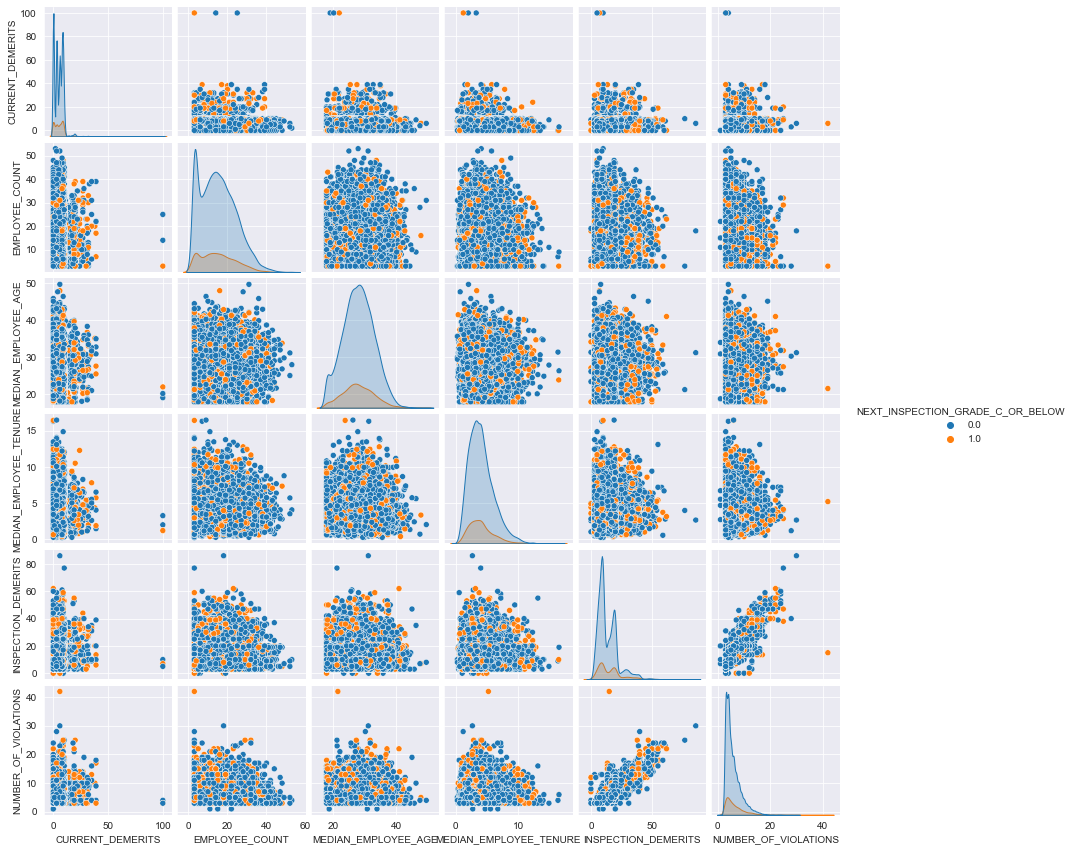

In [32]:
sample_features = \
['CURRENT_DEMERITS',
'EMPLOYEE_COUNT',
'MEDIAN_EMPLOYEE_AGE',
'MEDIAN_EMPLOYEE_TENURE',
'INSPECTION_DEMERITS',
'NUMBER_OF_VIOLATIONS',
'NEXT_INSPECTION_GRADE_C_OR_BELOW']
sns.pairplot(data=df[sample_features], hue='NEXT_INSPECTION_GRADE_C_OR_BELOW', height=2)

From the plots above, we can see that many of the distributions are uniform. However, we can see some clusting as well. For example, if the number of violations are high and the inspection demerits are high, we expect there to be a higher probability that the inspection recieves a grade of C or below.

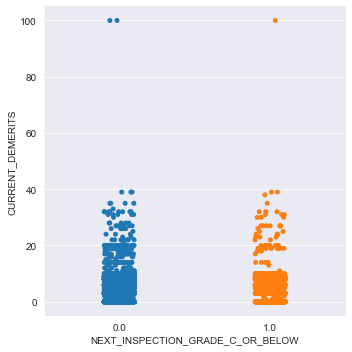

In [33]:
sns.catplot(x='NEXT_INSPECTION_GRADE_C_OR_BELOW', y='CURRENT_DEMERITS', data=df)

<AxesSubplot:xlabel='CURRENT_GRADE', ylabel='count'>

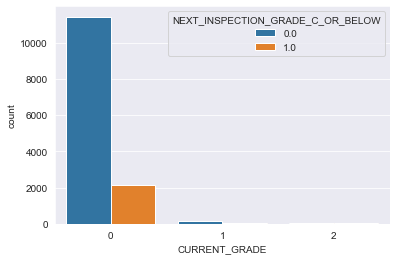

In [34]:
sns.countplot(x='CURRENT_GRADE', hue='NEXT_INSPECTION_GRADE_C_OR_BELOW', data=df)

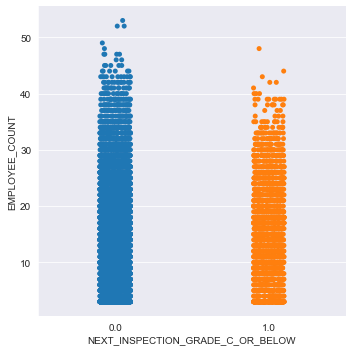

In [35]:
sns.catplot(x='NEXT_INSPECTION_GRADE_C_OR_BELOW', y='EMPLOYEE_COUNT', data=df)

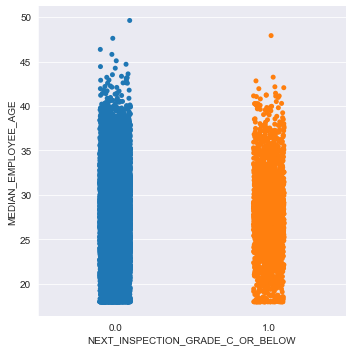

In [36]:
sns.catplot(x='NEXT_INSPECTION_GRADE_C_OR_BELOW', y='MEDIAN_EMPLOYEE_AGE', data=df)

We can see that the chances improve greatly for an inspection to pass when the number of employees is greater than 40.

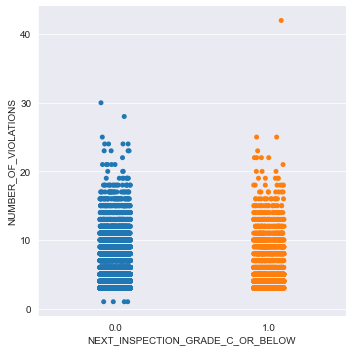

In [37]:
sns.catplot(x='NEXT_INSPECTION_GRADE_C_OR_BELOW', y='NUMBER_OF_VIOLATIONS', data=df)

<AxesSubplot:xlabel='FIRST_VIOLATION_TYPE', ylabel='count'>

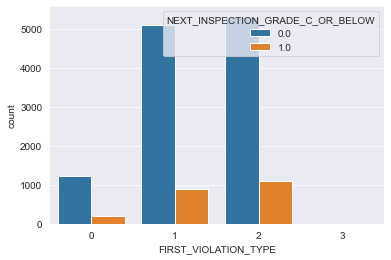

In [38]:
sns.countplot(x='FIRST_VIOLATION_TYPE', hue='NEXT_INSPECTION_GRADE_C_OR_BELOW', data=df)

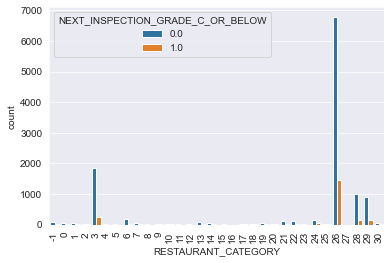

In [39]:
sns.countplot(x='RESTAURANT_CATEGORY', hue='NEXT_INSPECTION_GRADE_C_OR_BELOW', data=df)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

### Feature Selection

In [40]:
# 'INSPECTION_TIME','RECORD_UPDATED',

relevant_features = \
['RESTAURANT_CATEGORY',
'ZIP',
'CURRENT_GRADE',
'CURRENT_DEMERITS',
'EMPLOYEE_COUNT',
'MEDIAN_EMPLOYEE_AGE',
'MEDIAN_EMPLOYEE_TENURE',
'INSPECTION_TYPE',
'INSPECTION_DEMERITS',
'FIRST_VIOLATION_TYPE',
'SECOND_VIOLATION_TYPE',
'THIRD_VIOLATION_TYPE',
'NUMBER_OF_VIOLATIONS']

X = df[relevant_features]
y = df['NEXT_INSPECTION_GRADE_C_OR_BELOW']

X.head()

,RESTAURANT_CATEGORY,ZIP,CURRENT_GRADE,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS
0,28,89169.0,0,0.0,25.0,27.96,13.00,0,11.0,2,1,3,4.0
1,26,89108.0,0,3.0,7.0,27.72,3.92,0,9.0,1,1,0,5.0
2,26,89130.0,0,8.0,23.0,26.44,10.31,0,9.0,2,1,0,3.0
3,11,89101.0,0,0.0,14.0,33.99,4.16,0,5.0,1,0,0,3.0
4,3,89169.0,0,0.0,10.0,21.98,13.46,0,5.0,1,0,0,3.0


In [41]:
print(X.isnull().sum())

RESTAURANT_CATEGORY       0
ZIP                       0
CURRENT_GRADE             0
CURRENT_DEMERITS          0
EMPLOYEE_COUNT            0
MEDIAN_EMPLOYEE_AGE       0
MEDIAN_EMPLOYEE_TENURE    0
INSPECTION_TYPE           0
INSPECTION_DEMERITS       0
FIRST_VIOLATION_TYPE      0
SECOND_VIOLATION_TYPE     0
THIRD_VIOLATION_TYPE      0
NUMBER_OF_VIOLATIONS      0
dtype: int64


In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13855 entries, 0 to 15672
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RESTAURANT_CATEGORY     13855 non-null  int8   
 1   ZIP                     13855 non-null  float64
 2   CURRENT_GRADE           13855 non-null  int64  
 3   CURRENT_DEMERITS        13855 non-null  float64
 4   EMPLOYEE_COUNT          13855 non-null  float64
 5   MEDIAN_EMPLOYEE_AGE     13855 non-null  float64
 6   MEDIAN_EMPLOYEE_TENURE  13855 non-null  float64
 7   INSPECTION_TYPE         13855 non-null  int64  
 8   INSPECTION_DEMERITS     13855 non-null  float64
 9   FIRST_VIOLATION_TYPE    13855 non-null  int64  
 10  SECOND_VIOLATION_TYPE   13855 non-null  int64  
 11  THIRD_VIOLATION_TYPE    13855 non-null  int64  
 12  NUMBER_OF_VIOLATIONS    13855 non-null  float64
dtypes: float64(7), int64(5), int8(1)
memory usage: 1.9 MB


### Model Selection

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [44]:
# model list
models = []

models.append(("KNN", KNeighborsClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("BNB", BernoulliNB()))
models.append(("GNB", GaussianNB()))
models.append(("RF", RandomForestClassifier()))

In [45]:
strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True)

names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
    
kf_cross_val = pd.DataFrame({'Name' : names, 'Score' : scores })
print(kf_cross_val)

  Name  Score
0  KNN   0.82
1   DT   0.72
2  BNB   0.84
3  GNB   0.79
4   RF   0.84


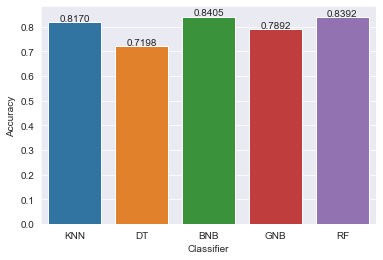

In [46]:
ax = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
ax.set(xlabel='Classifier', ylabel='Accuracy')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

From the classifiers tested we can see that the Bernoulli Naive Bayes model performed the best according to the stratified k-fold (k=10) cross-validation score. The Random Forset classifier performed almost as well as the Bernoulli Naive Bayes model, but fell short.

### Predictions

We will be using the Bernoilli Naive Bayes model for predicting inspection scores.

In [47]:
model = BernoulliNB()
model.fit(X, y)

BernoulliNB()

In [48]:
X_test = pd.read_csv('TEST_SET_2021.csv')

Pre-process the test set the same way we processed the training set

In [49]:
X_test = X_test[X_test['FIRST_VIOLATION_TYPE'].isin(['Critical', 'Imminent Health Hazard', 'Major', 'Non-Major'])]
X_test = X_test[X_test['SECOND_VIOLATION_TYPE'].isin(['Critical', 'Imminent Health Hazard', 'Major', 'Non-Major'])]
X_test = X_test[X_test['THIRD_VIOLATION_TYPE'].isin(['Critical', 'Imminent Health Hazard', 'Major', 'Non-Major'])]
violation_types = {'Non-Major': 0, 'Major': 1, 'Critical': 2, 'Imminent Health Hazard': 3}
X_test.replace({'FIRST_VIOLATION_TYPE': violation_types}, inplace=True)
X_test.replace({'SECOND_VIOLATION_TYPE': violation_types}, inplace=True)
X_test.replace({'THIRD_VIOLATION_TYPE': violation_types}, inplace=True)

X_test = X_test[X_test['INSPECTION_TYPE'].isin(['Re-inspection', 'Routine Inspection'])]
inspection_types = {'Routine Inspection': 0, 'Re-inspection': 1}
X_test.replace({'INSPECTION_TYPE': inspection_types}, inplace=True)

X_test = X_test[(X_test['EMPLOYEE_COUNT'] > 0) & (X_test['EMPLOYEE_COUNT'] < 900)]

X_test = X_test[(X_test['CURRENT_DEMERITS'] >= 0) & (X_test['CURRENT_DEMERITS'] <= 100)]

X_test = X_test[X_test['NUMBER_OF_VIOLATIONS'] != 'Nevada']
X_test['NUMBER_OF_VIOLATIONS'] = pd.to_numeric(X_test['NUMBER_OF_VIOLATIONS'], downcast="integer", errors='coerce')

X_test = X_test[X_test['CURRENT_GRADE'].isin(['A', 'B', 'C'])]
grade_types = {'A': 0, 'B': 1, 'C': 2}
X_test.replace({'CURRENT_GRADE': grade_types}, inplace=True)

X_test['INSPECTION_DEMERITS'] = pd.to_numeric(X_test['INSPECTION_DEMERITS'], downcast="integer", errors='coerce')

X_test['RESTAURANT_CATEGORY'] = X_test['RESTAURANT_CATEGORY'].astype('category').cat.codes

X_test['ZIP'] = X_test['ZIP'].str[:5]
X_test['ZIP'] = pd.to_numeric(X_test['ZIP'], downcast="integer", errors='coerce')

X_test['VIOLATIONS_RAW'].fillna('', inplace=True)
X_test['NUMBER_OF_VIOLATIONS'].fillna(X_test['VIOLATIONS_RAW'].str.split(",").str.len(), inplace=True)

X_test['MEDIAN_EMPLOYEE_AGE'].fillna(X_test['MEDIAN_EMPLOYEE_AGE'].mean(), inplace=True)
X_test['MEDIAN_EMPLOYEE_TENURE'].fillna(X_test['MEDIAN_EMPLOYEE_TENURE'].mean(), inplace=True)
X_test['INSPECTION_DEMERITS'].fillna(X_test['INSPECTION_DEMERITS'].mean(), inplace=True)

X_test['RESTAURANT_CATEGORY'].fillna(X_test['RESTAURANT_CATEGORY'].mode()[0], inplace=True)
X_test['ZIP'].fillna(X_test['ZIP'].mode()[0], inplace=True)

In [50]:
RESTAURANT_SERIAL_NUMBER = X_test['RESTAURANT_SERIAL_NUMBER']
X_test = X_test[relevant_features]
X_test.head()

,RESTAURANT_CATEGORY,ZIP,CURRENT_GRADE,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TYPE,INSPECTION_DEMERITS,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS
0,27,89158,0,6,3.00,31.14,3.54,0,21,2,1,1,5
1,3,89101,0,0,18.60,26.84,4.89,0,8,1,1,0,4
2,3,89101,0,8,5.73,31.20,1.88,0,15,1,1,1,6
4,24,89134,0,9,14.22,21.00,6.60,0,10,1,1,0,6
5,24,89017,0,8,7.52,23.65,8.76,0,9,1,1,1,6


In [51]:
CLASSIFIER_PREDICTION = model.predict(X_test)
CLASSIFIER_PROBABILITY = [x[0] for x in model.predict_proba(X_test)]

In [52]:
d = {'RESTAURANT_SERIAL_NUMBER': RESTAURANT_SERIAL_NUMBER, 'CLASSIFIER_PROBABILITY': CLASSIFIER_PROBABILITY, 'CLASSIFIER_PREDICTION': CLASSIFIER_PREDICTION}
classified_data = pd.DataFrame(data=d)

classified_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6293 entries, 0 to 7504
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RESTAURANT_SERIAL_NUMBER  6293 non-null   object 
 1   CLASSIFIER_PROBABILITY    6293 non-null   float64
 2   CLASSIFIER_PREDICTION     6293 non-null   float64
dtypes: float64(2), object(1)
memory usage: 196.7+ KB


In [53]:
classified_data.to_csv('predictions_Guiga_Mohammed.csv', index=False)

## Report

### Exploratory Data Analysis

I first explored the data visually and hypothesized which features coule be relevant to aid in classification. I came up with the following list of attributes:

#### Relevant Attributes for Model Fitting
- RESTAURANT_CATEGORY
- ZIP
- CURRENT_DEMERITS
- CURRENT_GRADE
- EMPLOYEE_COUNT
- MEDIAN_EMPLOYEE_AGE
- MEDIAN_EMPLOYEE_TENURE
- INSPECTION_TIME
- INSPECTION_TYPE
- INSPECTION_DEMERITS
- RECORD_UPDATED
- FIRST_VIOLATION_TYPE
- SECOND_VIOLATION_TYPE
- THIRD_VIOLATION_TYPE
- NUMBER_OF_VIOLATIONS
- NEXT_INSPECTION_GRADE_C_OR_BELOW'

#### Irrelevant or Redundant Attributes for Model Fitting
- RESTAURANT_SERIAL_NUMBER
- RESTAURANT_PERMIT_NUMBER
- RESTAURANT_NAME
- RESTAURANT_LOCATION
- ADDRESS
- CITY
- STATE
- VIOLATIONS_RAW
- LAT_LONG_RAW
- FIRST_VIOLATION (FIRST_VIOLATION_TYPE can capture ranking)
- SECOND_VIOLATION (SECOND_VIOLATION_TYPE can capture ranking)
- THIRD_VIOLATION (THIRD_VIOLATION_TYPE can capture ranking)

I believe that the restaurant serial number, permit number, and name are not relevant since they are mostly unique to each restaurant. The restaurant location, address, city, and state do not provide any more information than the zip code (or lat/long) do. Furthermore, all restaurants in this data set are in the same city/state. The raw violations are aggregated in the number of violations column, and are redunandt if kept. Furthermore, the first, second, and third violation can be ignored since we have the types of each violation. The types of each violation are ordinal, which can be useful in some situations. 

### Data Cleaning

A few columns contained data that did not match the essense of the column. For example, the 'NEXT_INSPECTION_GRADE_C_OR_BELOW' column contained values like 'Goat', and other random numbers that held no meaning since it should be a binary classification. We have other examples like 'CURRENT_GRADE', which contained 'Nasa' as one of the values. Moreover, the rest of the columns with 'bad data' were cleaned by removing extreme values and/or values that were not in scope of the column defenition. Another example encountered was a date that was in the future (year 2027). 

### Data Transformation

The first, second, and third violation types were mapped to the following numerical values:

- 'Non-Major': 0
- 'Major': 1
- 'Critical': 2
- 'Imminent Health Hazard': 3

The inspection types were mapped to the following numerical values:

- 'Routine Inspection': 0
- 'Re-inspection': 1

The current grades were mapped to the following numerical values:

- 'A': 0
- 'B': 1
- 'C': 2

The restaurant categories were mapped using the following code: df['RESTAURANT_CATEGORY'].astype('category').cat.codes

The 'NEXT_INSPECTION_GRADE_C_OR_BELOW', 'NUMBER_OF_VIOLATIONS', 'INSPECTION_DEMERITS', and 'ZIP', were converted to a numeric data type. Furthermore, the zip codes were stripped to only include the first 5 characters. This was done for convenience and simple numerical conversion.

The NULL values in the 'NUMBER_OF_VIOLATIONS' column were filled by counting the number of violations in the 'VIOLATIONS_RAW' column.

The NULL values in the 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE', and 'INSPECTION_DEMERITS' columns were filled using the mean of the values of each respective column.

The NULL values in the 'RESTAURANT_CATEGORY' and 'ZIP' columns were filled using the mode of the values of each respective column.

### Modeling Process

#### Feature Selection

The following features were selected:

- 'RESTAURANT_CATEGORY'
- 'ZIP'
- 'CURRENT_GRADE'
- 'CURRENT_DEMERITS'
- 'EMPLOYEE_COUNT'
- 'MEDIAN_EMPLOYEE_AGE'
- 'MEDIAN_EMPLOYEE_TENURE'
- 'INSPECTION_TYPE'
- 'INSPECTION_DEMERITS'
- 'FIRST_VIOLATION_TYPE'
- 'SECOND_VIOLATION_TYPE'
- 'THIRD_VIOLATION_TYPE'
- 'NUMBER_OF_VIOLATIONS'

#### Model Testing


The following models were explored:

- K Nearest Neighbors
- Decision Tree 
- Bernoulli Naive Bayes
- Gaussian Naive Bayes
- Random Forest

These models were cross-validated using Stratified K-Fold cross-validation, and the performance was as follows:

1. Bernoulli Naive Bayes   - 0.8406
2. Random Forest           - 0.8393
3. K Nearest Neighbors     - 0.8156
4. Gaussian Naive Bayes    - 0.7886
5. Decision Tree           - 0.7198

Since Bernoulli Naive Bayes performed the best according to the cross-validation score, we chose is as the classifier for this task. This classifier was then fit with the selected features. The test data was then processed in the same fashion as the training data, and predictions were made using the Bernoilli Naive Bayes classifier.

### Recommendations

I believe that a workable model can be built with the data provied. However, I believe that this can be greatly improved.

Additional attributes to explore:

- Common pests in area
- Equipment Age
- Number of Sinks
- Food Surface Material
- Building Age
- Restaurant Age
- Restaurant Popularity
- Restaurant Profit
- Waste Management Type
- Cross-Contamination Risk
